In [2]:
library (ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
temp <- c(194.5,194.3,197.9,198.4,199.4,199.9,200.9,201.1,201.4,201.3,203.6,204.6,209.5,208.6,210.7,211.9,212.2)
temp
pres <- c(20.79,20.79,22.40,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06)
pres


[1] 194.5 194.3 197.9 198.4 199.4 199.9 200.9 201.1 201.4 201.3 203.6 204.6
[13] 209.5 208.6 210.7 211.9 212.2

[1] 20.79 20.79 22.40 22.67 23.15 23.35 23.89 23.99 24.02 24.01 25.14 26.57
[13] 28.49 27.76 29.04 29.88 30.06

In [4]:
cov(pres,temp)

[1] 17.34638

In [5]:
mi_df <- data.frame(
 "temperatura"= temp,
 "presion"= pres)
mi_df

temperatura,presion
194.5,20.79
194.3,20.79
197.9,22.40
198.4,22.67
199.4,23.15
199.9,23.35
200.9,23.89
201.1,23.99
201.4,24.02
201.3,24.01


In [6]:
logpres <- 100*log10(mi_df$presion)
log<- data.frame(logpres)
datos <- cbind(mi_df, log)
datos

temperatura,presion,logpres
194.5,20.79,131.7854
194.3,20.79,131.7854
197.9,22.40,135.0248
198.4,22.67,135.5452
199.4,23.15,136.4551
199.9,23.35,136.8287
200.9,23.89,137.8216
201.1,23.99,138.0030
201.4,24.02,138.0573
201.3,24.01,138.0392


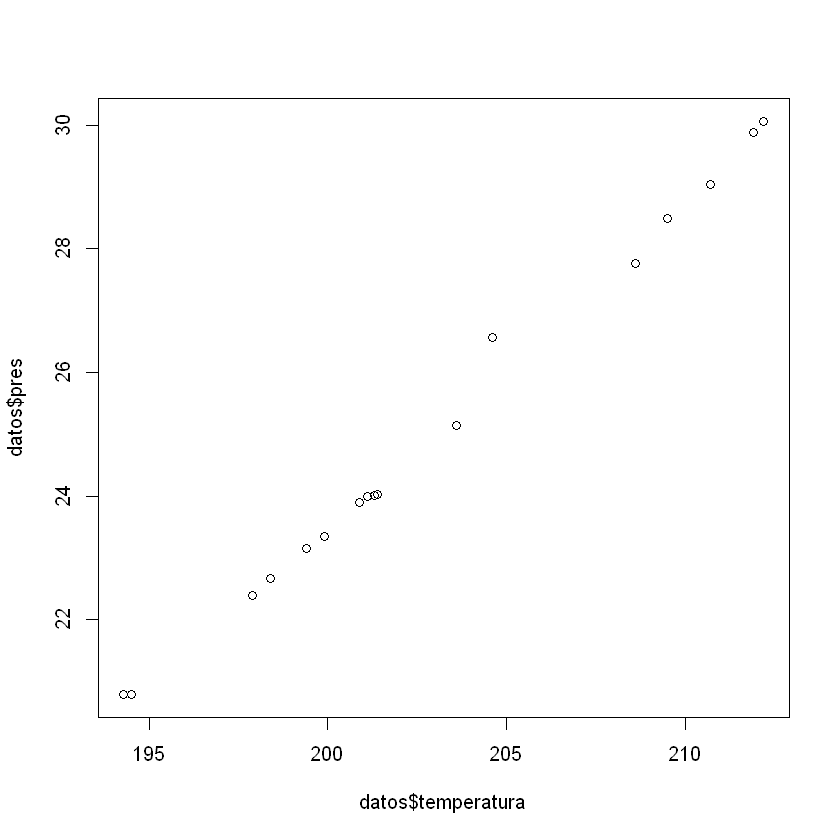

In [7]:
plot(datos$temperatura,datos$pres)

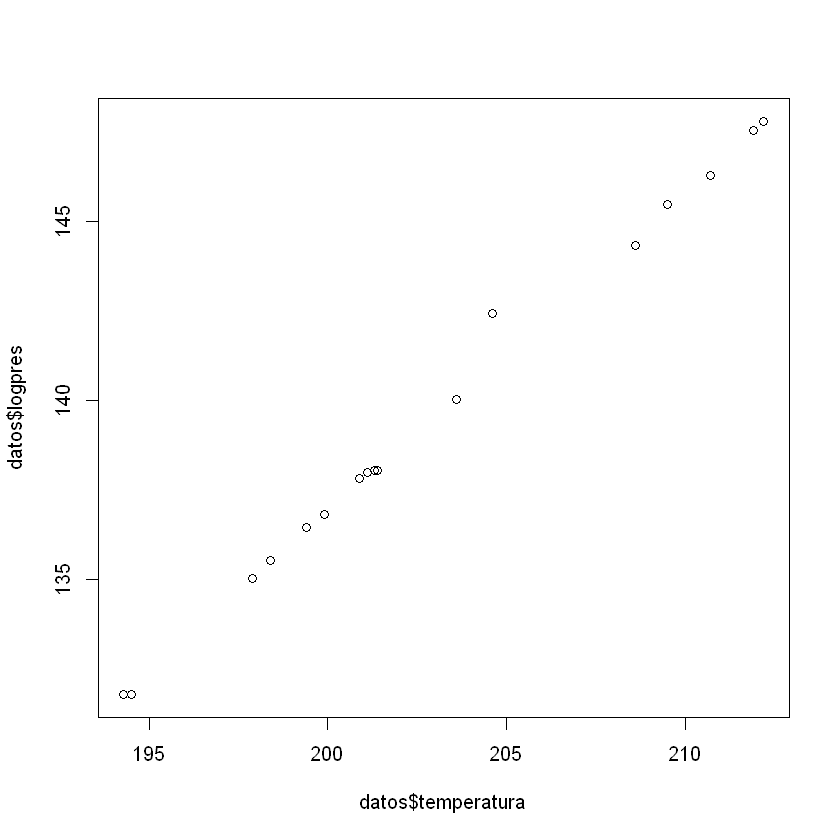

In [8]:
plot(datos$temperatura,datos$logpres)

In [9]:
summary(datos)

  temperatura       presion         logpres     
 Min.   :194.3   Min.   :20.79   Min.   :131.8  
 1st Qu.:199.4   1st Qu.:23.15   1st Qu.:136.5  
 Median :201.3   Median :24.01   Median :138.0  
 Mean   :203.0   Mean   :25.06   Mean   :139.6  
 3rd Qu.:208.6   3rd Qu.:27.76   3rd Qu.:144.3  
 Max.   :212.2   Max.   :30.06   Max.   :147.8  

In [10]:
 
x <- datos$temp
y <- datos$logpres

beta <- data.frame(
 "1"= 1:17,
  "2"= 1:17)


In [11]:
## estimadores para beta0 y beta1
for (i in 1:17) {
    
    beta[i,1] <- ((datos[i,3])-mean(datos$logpres)) *(datos[i,1]-mean(datos$temp))
    SXY <- sum(beta[,1])
}

for (i in 1:17){
    
    beta[i,2] <- (((datos[i,1]-mean(datos$temp)))^2)
    SXX <- sum(beta[,2])
}


b1gorro <- SXY/SXX
b1gorro

[1] 0.8956178

In [12]:
b0gorro <- mean(y)- b1gorro *mean(x)
b0gorro


[1] -42.16418

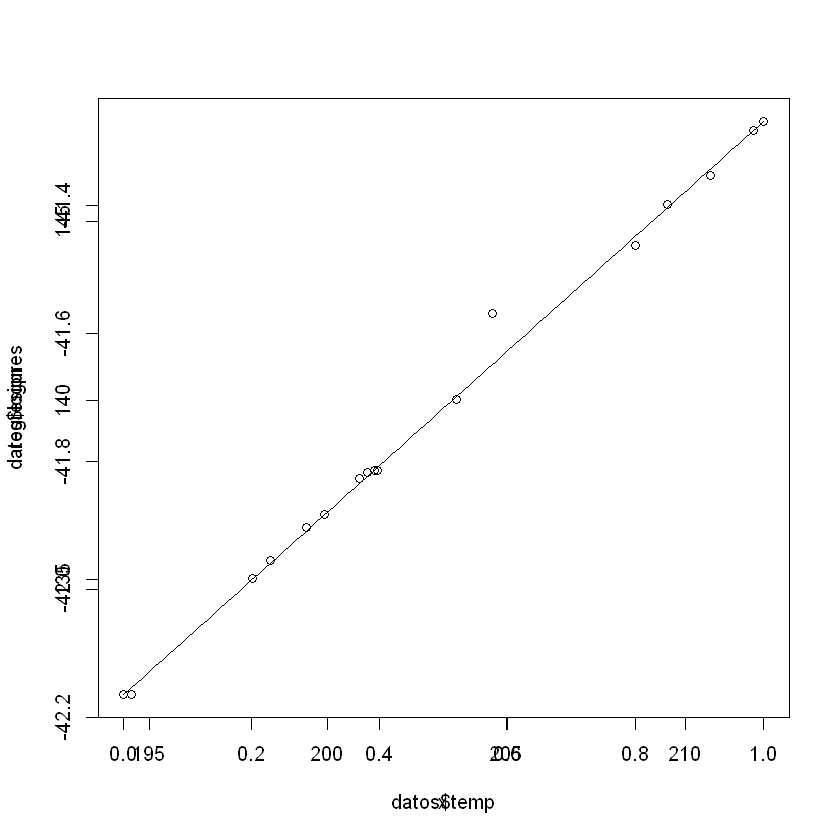

In [13]:
regresion <- function(x){b0gorro + b1gorro * x}
plot (datos$temp, datos$logpres)
par(new=TRUE)
plot(regresion)

In [14]:
reglineal <- lm(logpres ~ temperatura, data = datos)
summary(reglineal)


Call:
lm(formula = logpres ~ temperatura, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31974 -0.14707 -0.06890  0.01877  1.35994 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.16418    3.34136  -12.62 2.17e-09 ***
temperatura   0.89562    0.01646   54.42  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3792 on 15 degrees of freedom
Multiple R-squared:  0.995,	Adjusted R-squared:  0.9946 
F-statistic:  2962 on 1 and 15 DF,  p-value: < 2.2e-16


In [15]:
residuals(reglineal)

1           2           3           4           5           6 
-0.24802254 -0.06889899 -0.05377004  0.01877126  0.03310101 -0.04111891 
          7           8           9          10          11          12 
 0.05618981  0.05847608 -0.15593374 -0.08445627 -0.14706580  1.35994454 
         13          14          15          16          17 
 0.00150698 -0.31973578 -0.24281806 -0.07916126 -0.08700828

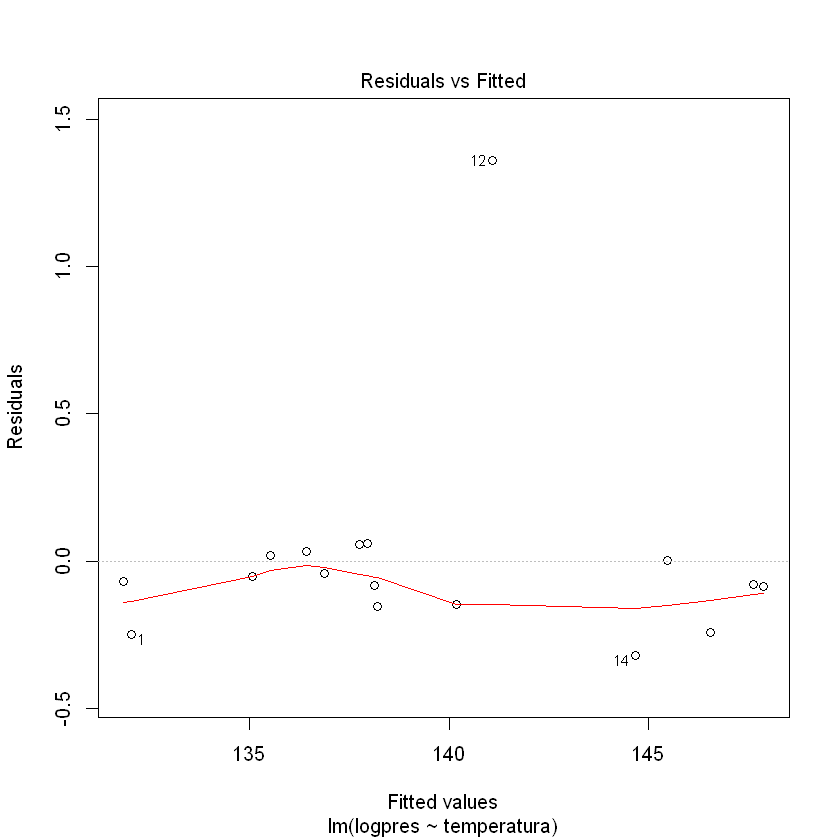

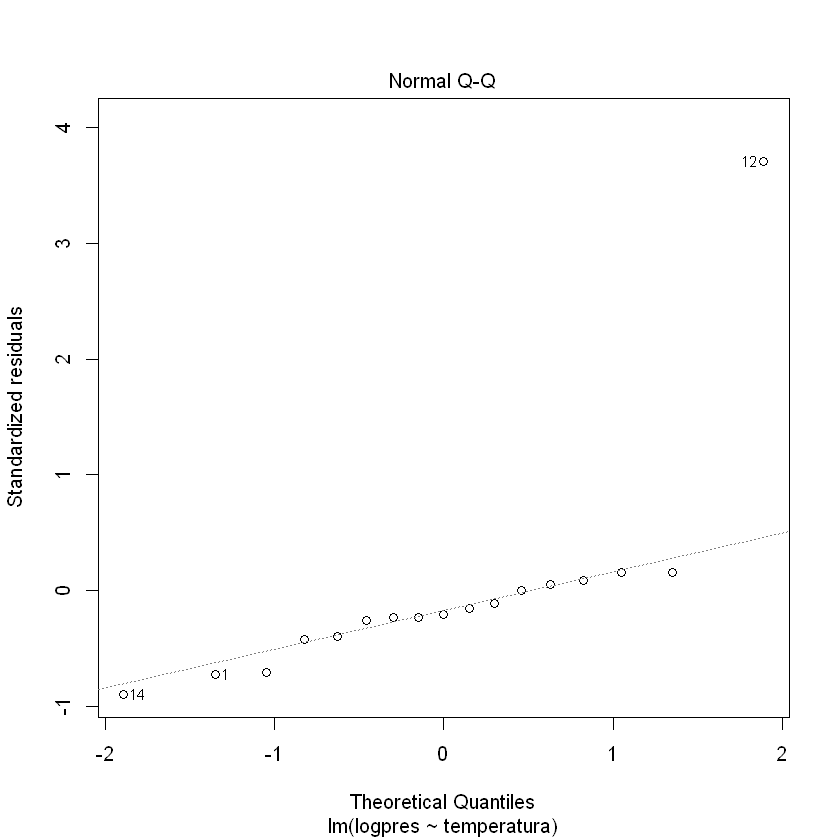

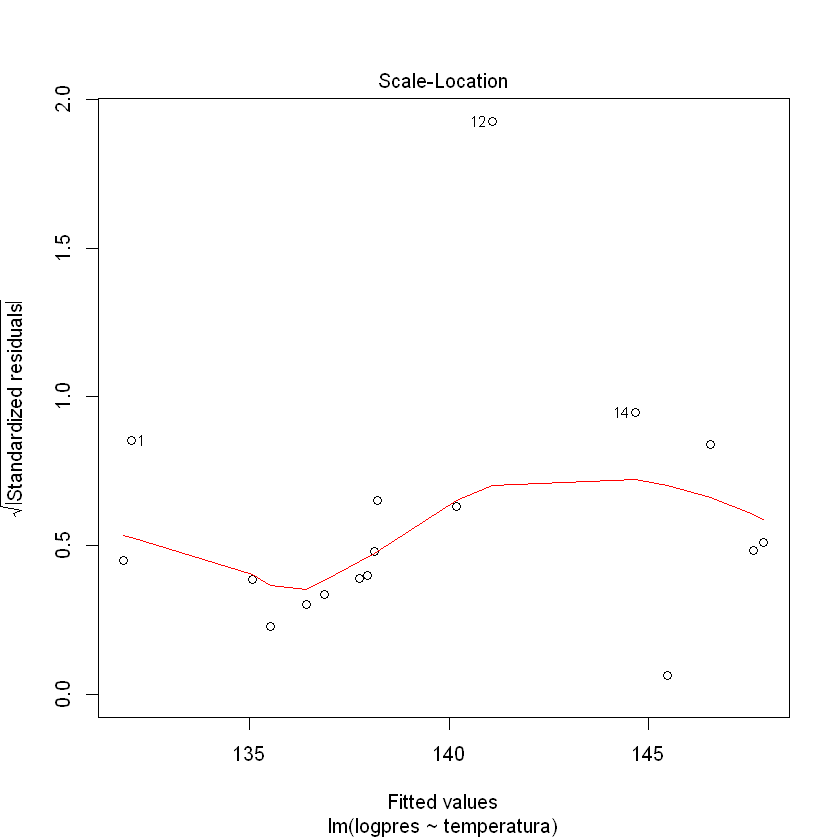

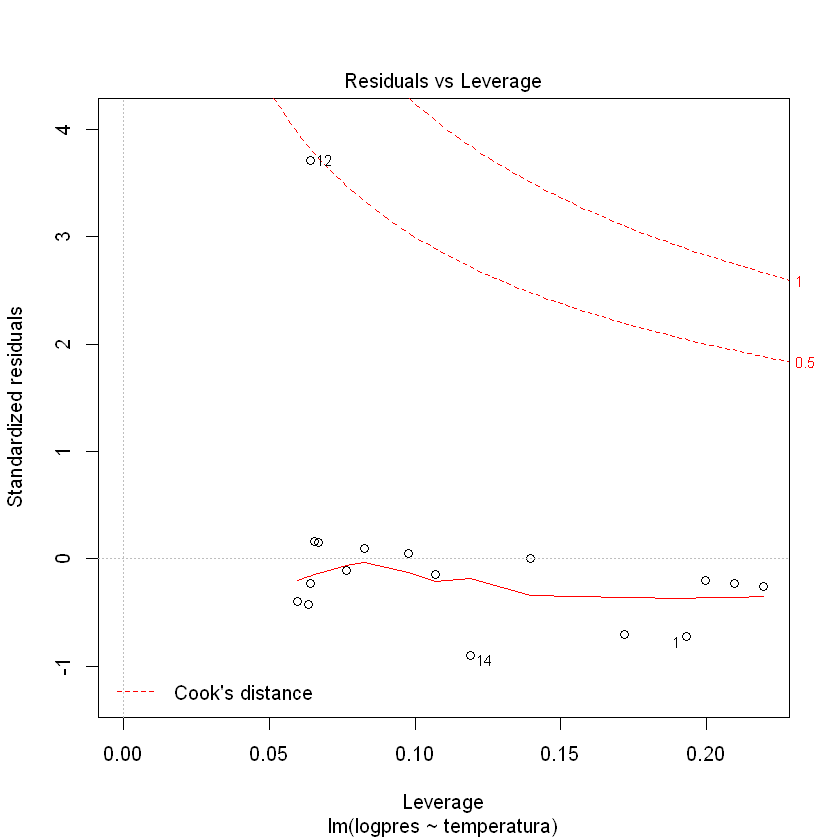

In [16]:
regresion <- function(x){b0gorro + b1gorro * x}

plot(reglineal)


`geom_smooth()` using formula 'y ~ x'


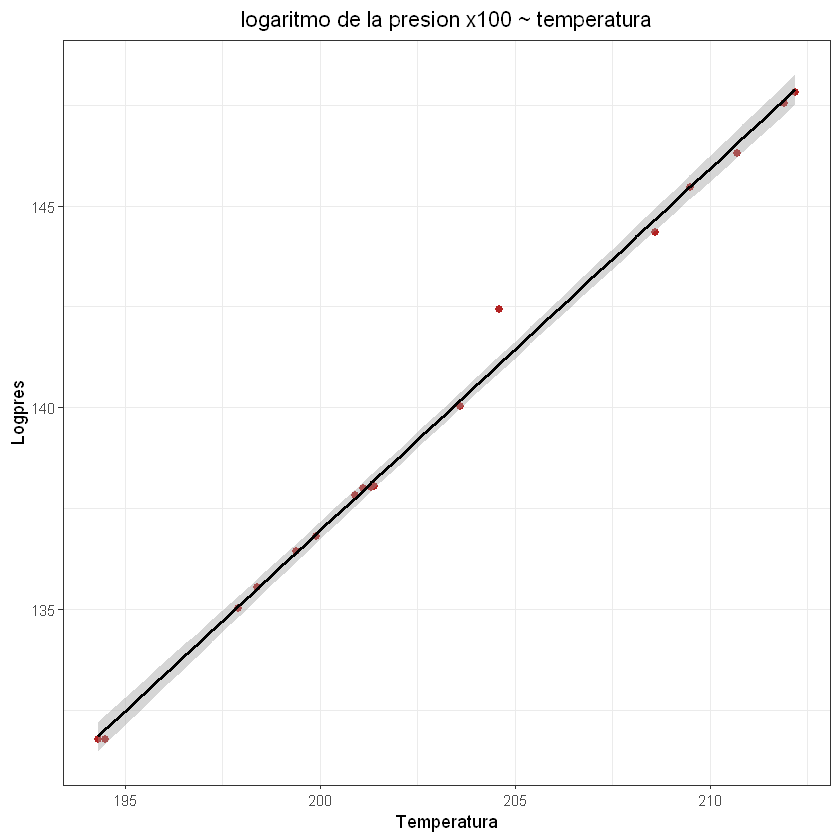

In [17]:
ggplot(data = datos, mapping = aes(x = temperatura, y = logpres)) +
geom_point(color = "firebrick", size = 2) +
geom_smooth(method = "lm", se = TRUE, color = "black") +
labs(title = "logaritmo de la presion x100 ~ temperatura", x = "Temperatura", y = "Logpres") +
theme_bw() + theme(plot.title = element_text(hjust = 0.5)) 